In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve

In [2]:
data = load_iris()  # or load_breast_cancer()
X = data.data
y = data.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [5]:
# Predict the test set
y_pred = model.predict(X_test)

# Print the classification report
print("Classification Report for Logistic Regression:\n")
print(classification_report(y_test, y_pred))

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



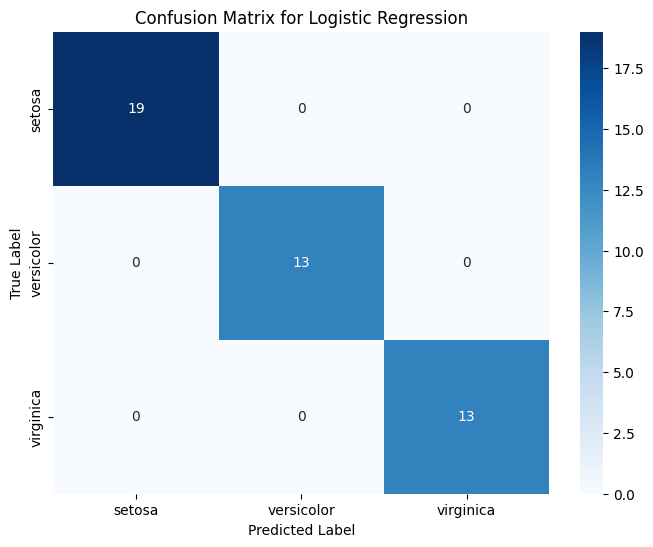

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

Your Task:

* - Choose Any dataset (Binary Classification)  
* - Load Dataset
* - Use the Fully connected NN you designe din the 2nd Last Lab
* - Train your FCNN on that dataset
* - Do the evluation useing Precision, Recall, F-Measure, ROC
* - Plot a confusion Metric


In [7]:
from tensorflow import keras
import tensorflow as tf
import seaborn as sn
from sklearn.metrics import auc

In [8]:
data = load_breast_cancer()
X = data.data
y = data.target

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
print('Breast Cancer Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

Breast Cancer Dataset Shape:
X_train: (398, 30)
Y_train: (398,)
X_test:  (171, 30)
Y_test:  (171,)


In [11]:
X_train[0]

array([1.374e+01, 1.791e+01, 8.812e+01, 5.850e+02, 7.944e-02, 6.376e-02,
       2.881e-02, 1.329e-02, 1.473e-01, 5.580e-02, 2.500e-01, 7.574e-01,
       1.573e+00, 2.147e+01, 2.838e-03, 1.592e-02, 1.780e-02, 5.828e-03,
       1.329e-02, 1.976e-03, 1.534e+01, 2.246e+01, 9.719e+01, 7.259e+02,
       9.711e-02, 1.824e-01, 1.564e-01, 6.019e-02, 2.350e-01, 7.014e-02])

In [12]:
y_train[:5]

array([1, 1, 1, 1, 1])

In [13]:
#Fully Connected NN training
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30, )),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
13/13 [==============================] - 4s 14ms/step - loss: 8.4239 - accuracy: 0.5503
Epoch 2/5
13/13 [==============================] - 0s 8ms/step - loss: 1.4029 - accuracy: 0.7186
Epoch 3/5
13/13 [==============================] - 0s 16ms/step - loss: 0.7911 - accuracy: 0.8266
Epoch 4/5
13/13 [==============================] - 0s 12ms/step - loss: 0.3693 - accuracy: 0.8894
Epoch 5/5
13/13 [==============================] - 0s 11ms/step - loss: 0.5475 - accuracy: 0.8417


In [14]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 1s 15ms/step - loss: 0.1200 - accuracy: 0.9474


[0.1199701800942421, 0.9473684430122375]

6/6 [==============================] - 0s 6ms/step


Text(95.72222222222221, 0.5, 'Truth')

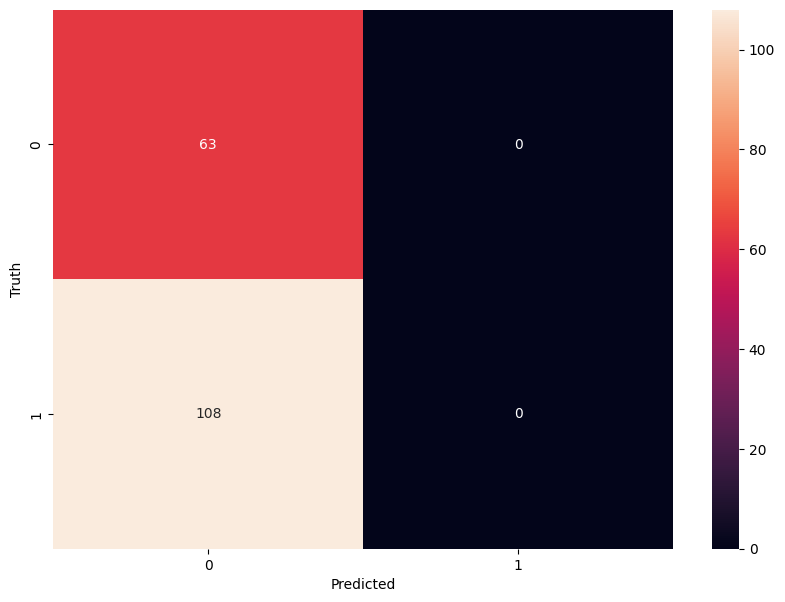

In [15]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [16]:
# Print the classification report
print("Classification Report for Fully Connected NN:\n")
print(classification_report(y_test, y_predicted_labels))

Classification Report for Fully Connected NN:

              precision    recall  f1-score   support

           0       0.37      1.00      0.54        63
           1       0.00      0.00      0.00       108

    accuracy                           0.37       171
   macro avg       0.18      0.50      0.27       171
weighted avg       0.14      0.37      0.20       171



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
y_pred_prob = model.predict(X_test)

6/6 [==============================] - 0s 10ms/step


In [18]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

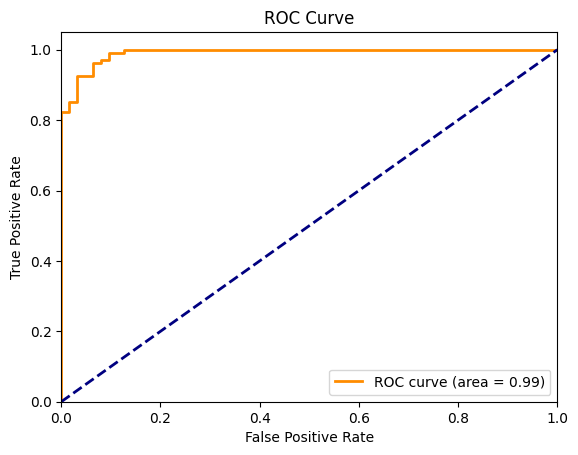

In [19]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [20]:
#FCNN training
model = keras.Sequential([
    keras.layers.Reshape((30, 1), input_shape=(30,)),
    keras.layers.Conv1D(64, 3, activation='relu'),
    keras.layers.MaxPooling1D(2),
    keras.layers.Conv1D(128, 3, activation='relu'),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
13/13 [==============================] - 3s 11ms/step - loss: 1.7121 - accuracy: 0.5176
Epoch 2/5
13/13 [==============================] - 0s 11ms/step - loss: 0.7401 - accuracy: 0.6156
Epoch 3/5
13/13 [==============================] - 0s 10ms/step - loss: 0.5095 - accuracy: 0.7387
Epoch 4/5
13/13 [==============================] - 0s 11ms/step - loss: 0.4229 - accuracy: 0.8467
Epoch 5/5
13/13 [==============================] - 0s 12ms/step - loss: 0.4212 - accuracy: 0.8291


In [21]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 4ms/step - loss: 0.4085 - accuracy: 0.8421


[0.40854161977767944, 0.8421052694320679]

6/6 [==============================] - 0s 4ms/step


Text(95.72222222222221, 0.5, 'Truth')

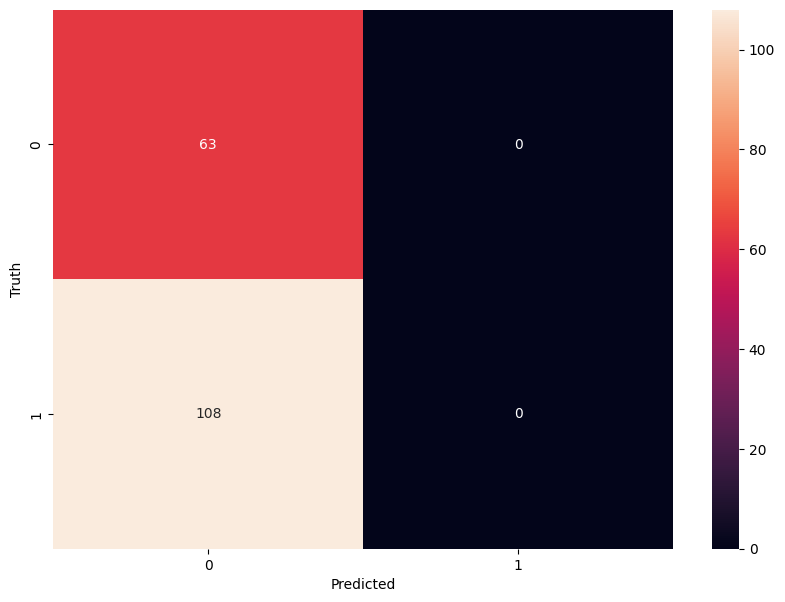

In [22]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [23]:
# Print the classification report
print("Classification Report for FCNN:\n")
print(classification_report(y_test, y_predicted_labels))

Classification Report for FCNN:

              precision    recall  f1-score   support

           0       0.37      1.00      0.54        63
           1       0.00      0.00      0.00       108

    accuracy                           0.37       171
   macro avg       0.18      0.50      0.27       171
weighted avg       0.14      0.37      0.20       171



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
y_pred_prob = model.predict(X_test)

6/6 [==============================] - 0s 8ms/step


In [25]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

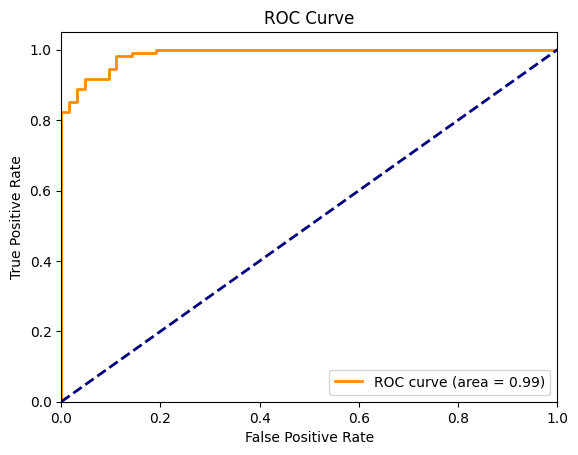

In [26]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()